## Final Project Submission

Please fill out:
* Student name:
1. Winfred Kinya Bundi.
2. Carol Mundia.
3. Paul Muniu.
4. Dennis Mwenda.
* Student pace: Full time Hybrid
* Scheduled project review date/time:2/05/2024 
* Instructor name: Mwikali Maryanne.
* Blog post URL:git@github.com:winnycodegurl/dsc-phase-2-projectgroup4.git


## INTRODUCTION

In the fast-paced world of real estate, it's crucial for agencies to provide clients with precise information. Clients, whether they're looking to become homeowners or investors, rely on real estate companies for guidance on important decisions such as pricing, market trends, and property evaluations. To meet this need, real estate agencies can benefit from a sophisticated regression-based tool. This tool uses various property variables like the number of bedrooms, year built, floor count, living area, condition, location, and amenities to accurately predict property prices. By employing regression analysis, agencies can offer clients more precise pricing estimates, leading to better-informed decisions. Ultimately, this tool aims to improve client satisfaction, streamline decision-making processes, and drive success for real estate agencies.


## BUSINESS UNDERSTANDING



The provided dataset encompasses details on homes sold, encompassing their attributes and sale prices. This dataset holds significant potential for real estate agencies across various avenues:



1. 
Market Analysis: Leveraging the dataset, agencies can discern market trends, including the demand for different property types, burgeoning neighborhoods witnessing property value escalations, and the impact obetter f featurenws or property renovations on sale prices. By employing market segmentation techniques, such as demographic or psychographic segmentation, agencies can further refine their analysis to understand the preferences and behaviors of distinct customer segments within the real estate market




2. 
Property Valuation: By comprehending the correlation between house features and sale prices, agencies can proficiently gauge property values for both sellers and buyers, ensuring equitable and competitive pricing strategies




3. 
Targeted Marketing: Through discerning buyer preferences from the dataset, agencies can tailor marketing endeavors to resonate with potential buyers seeking specific property types or neighborhoods, thus enhancing the efficacy of their outreach efforts. Market segmentation insights can inform the development of targeted marketing campaigns tailored to the unique needs and preferences of different customer segments, thereby maximizing the impact of marketing investments.






## PROBLEM STATEMENT.



In King County, people involved in real estate have trouble figuring out what affects property values and trends in the market.
This study wants to help by looking at things like what features a property has, where it's located, what buyers prefer,
and how things change over time. By understanding these things better, people in real estate can make smarter choices about
buying and selling property and how they position themselves in the market.
The main goal is to give them practical advice that helps them do well in King County's real estate market, 
which is always changing.










## OBJECTIVES.

Main OBJECTIVE


The primary aim of this project is to develop a predictive regression model to support real estate agencies in advising clients 
on house prices. This model is intended to anticipate potential changes in property value based on property characteristics, 
furnishing clients with valuable insights to facilitate informed investment decisions.



Specific Goals:


i). Identification of Key Influencing Factors on House Prices:



Analyze various property features, including bedrooms, bathrooms, and square footage, to determine their impact on sale price.
Investigate location-related attributes such as zip codes and geographic coordinates to further comprehend their effect on 
property prices.



ii). Assessment of Model Performance:


Employ metrics such as mean squared error, R-squared values, and residual analysis to 
evaluate the model's accuracy in predicting house prices effectively.

    

iii). Provision of Actionable Recommendations:



Offer practical recommendations to real estate agencies aimed at enhancing profitability and market presence. 
Utilize insights gleaned from the model to optimize marketing strategies and enhance overall decision-making processes.








# Data Understanding.


King County, Washington, situated in the northwest of the United States, is known for its vibrant housing market centered around Seattle. The county has experienced significant growth due to its strong economy and cultural importance, attracting a large number of residents and creating high demand for housing in both urban and suburban areas. Seattle, with its impressive skyline, is especially sought after by tech professionals and city lovers. King County's real estate market is competitive, offering a range of neighborhoods to suit different preferences, from historic areas to modern suburban developments.

### Whereby the dataset contains:

### Target Variable

price: Sale price of the house .

### Unique identifier

id - Unique identifier for a house

### Property Characteristics:

bedrooms: Number of bedrooms.

bathrooms: Number of bathrooms.

sqft_living: Square footage of living space in the home.

sqft_lot: Square footage of the lot.

floors: Number of floors (levels) in the house.

waterfront: Indicates whether the house is on a waterfront (categorical: YES/NO).

view: Quality of view from the house, categorized into various types.

condition: Overall condition of the house, categorized based on maintenance.

grade: Overall grade of the house, reflecting construction and design quality.

### Additional Features:

sqft_above: Square footage of house apart from the basement.

sqft_basement: Square footage of the basement.

yr_built: Year when the house was built.

yr_renovated: Year when the house was renovated.

zipcode: ZIP Code of the property.

lat: Latitude coordinate of the property.

long: Longitude coordinate of the property.

sqft_living15: Square footage of interior housing living space for the nearest 15 neighbors.

sqft_lot15: Square footage of the land lots of the nearest 15 neighbors.

### TABLE OF CONTENTS
1.Data Preparation

2.Data cleaning

3.Exploratory data analysis

4.Statistical Analysis

5.Modelling

6.Regression Results

7.Conclusion

8.Reccomendations

# 1. DATA PREPARATION

In [12]:
# Importing necessary libraries for data analysis and visualization

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  # for data visualization.
%matplotlib inline
import seaborn as sns  # for enhanced data visualization.
from pandas.api.types import is_numeric_dtype  # Used to check if a data type is numeric.

from statsmodels.stats.outliers_influence import variance_inflation_factor  # For calculating Variance Inflation Factor (VIF).
from statsmodels.graphics.regressionplots import plot_partregress_grid  # For partial regression plots.
from sklearn.model_selection import train_test_split  # Used to split data into training and testing sets.
from sklearn.preprocessing import PolynomialFeatures  # Generate polynomial features.
from sklearn.linear_model import LinearRegression  # Linear Regression model.
from sklearn.preprocessing import StandardScaler  # Standardizing/Scaling features.
from sklearn.feature_selection import RFE  # Recursive Feature Elimination for feature selection.
from sklearn.metrics import mean_squared_error, r2_score  # Evaluation metrics for model performance.
import statsmodels.api as sm
from scipy.stats import kstest

# Statsmodels is used to create statistical models.
from scipy import stats  # Scientific computing library for statistical tests.
from scipy.stats import f_oneway  # One-way ANOVA statistical test.
from scipy.stats import ttest_ind  # Independent sample t-test for comparing means.

In [13]:
# Load the dataset to inspect the initial state of the data
file_path = 'data/kc_house_data.csv'
housing_data = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataset
housing_data.info(), housing_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

(None,
            id        date     price  bedrooms  bathrooms  sqft_living  \
 0  7129300520  10/13/2014  221900.0         3       1.00         1180   
 1  6414100192   12/9/2014  538000.0         3       2.25         2570   
 2  5631500400   2/25/2015  180000.0         2       1.00          770   
 3  2487200875   12/9/2014  604000.0         4       3.00         1960   
 4  1954400510   2/18/2015  510000.0         3       2.00         1680   
 
    sqft_lot  floors waterfront  view  ...          grade sqft_above  \
 0      5650     1.0        NaN  NONE  ...      7 Average       1180   
 1      7242     2.0         NO  NONE  ...      7 Average       2170   
 2     10000     1.0         NO  NONE  ...  6 Low Average        770   
 3      5000     1.0         NO  NONE  ...      7 Average       1050   
 4      8080     1.0         NO  NONE  ...         8 Good       1680   
 
    sqft_basement yr_built  yr_renovated  zipcode      lat     long  \
 0            0.0     1955           0.0  

In [14]:
# Creating function to check counts of missing values
def has_missing_values(df):
    missing_values = df.isnull().sum()
    num_missing_values = missing_values[missing_values > 0].count()
    if num_missing_values == 0:
        print("There are no missing values in the DataFrame.")
    else:
        print(f"There are {num_missing_values} columns with missing values.")
        print(missing_values[missing_values > 0])
        
has_missing_values(housing_data)

There are 3 columns with missing values.
waterfront      2376
view              63
yr_renovated    3842
dtype: int64


In [15]:
#creating a function to check for duplicates.
def has_duplicates(df):
    num_duplicates = df.duplicated().sum()
    if num_duplicates == 0:
        print("There are no duplicate rows in the DataFrame.")
    else:
        print(f"There are {num_duplicates} duplicate rows in the DataFrame.")

has_duplicates(housing_data)

There are no duplicate rows in the DataFrame.


The dataset contains 21,597 entries and 21 features. Here’s a brief overview of the data:

### Columns and Their Data Types:
### Numerical:
id, price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, sqft_above, yr_built, yr_renovated, zipcode, lat, long, sqft_living15, sqft_lot15

### Categorical:
date (format object, should be datetime), waterfront, view, condition, grade, sqft_basement (format object, should be numeric)

### Missing Values:
waterfront: 2,376 missing values
view: 63 missing values
yr_renovated: 3,842 missing values


## 2. DATA CLEANING

### A) Handle Missing Values:
#### waterfront and view: 
Since these are categorical, we can replace missing values with the mode or create a separate category for missing values.
yr_renovated: A significant number of missing values suggest that these houses might not have been renovated. Impute with 0 or a specific marker value.

### B) Convert Data Types:
#### date:
Convert from object to datetime format.
sqft_basement: Convert from object to numeric, handling any non-numeric entries.

### C)Encode Categorical Data:
One-hot encoding for categorical variables with no intrinsic ordering (waterfront, view, condition, grade).
This approach avoids any ordinal implications that could mislead the model.



In [16]:
# A)Handle missing values
# For categorical data, impute missing values with mode or specific marker
waterfront_mode = housing_data['waterfront'].mode()[0]
view_mode = housing_data['view'].mode()[0]

housing_data['waterfront'].fillna(waterfront_mode, inplace=True)
housing_data['view'].fillna(view_mode, inplace=True)
housing_data['yr_renovated'].fillna(0, inplace=True)  # Assuming no renovation if NaN


# B) Convert data types
from datetime import datetime

housing_data['date'] = pd.to_datetime(housing_data['date'])
housing_data['sqft_basement'] = pd.to_numeric(housing_data['sqft_basement'], errors='coerce')  # Convert to numeric, coerce errors
housing_data['sqft_basement'].fillna(0, inplace=True)  # Assuming no basement if NaN or non-numeric

# Check transformations
housing_data.info(), housing_data[['waterfront', 'view', 'yr_renovated', 'date', 'sqft_basement']].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  object        
 9   view           21597 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

(None,
   waterfront  view  yr_renovated       date  sqft_basement
 0         NO  NONE           0.0 2014-10-13            0.0
 1         NO  NONE        1991.0 2014-12-09          400.0
 2         NO  NONE           0.0 2015-02-25            0.0
 3         NO  NONE           0.0 2014-12-09          910.0
 4         NO  NONE           0.0 2015-02-18            0.0)

The missing values have been addressed and data types for relevant columns have been corrected:

#### Missing Values:

waterfront and view had missing values which were filled using the mode of their respective columns.

yr_renovated missing values were filled with 0, assuming that a missing value indicates no renovation.

#### Data Type Conversions:
The date column has been converted to a datetime format.

The sqft_basement column, previously an object due to some non-numeric entries, has been converted to numeric. Missing and non-numeric entries were replaced with 0, assuming no basement in such cases.


In [17]:
# One-hot encoding for categorical variables without a natural order
housing_data_encoded = pd.get_dummies(housing_data, columns=['waterfront', 'view', 'condition', 'grade'], drop_first=True)

# Display the columns after encoding to confirm the transformation
housing_data_encoded.info(), housing_data_encoded.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 36 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   21597 non-null  int64         
 1   date                 21597 non-null  datetime64[ns]
 2   price                21597 non-null  float64       
 3   bedrooms             21597 non-null  int64         
 4   bathrooms            21597 non-null  float64       
 5   sqft_living          21597 non-null  int64         
 6   sqft_lot             21597 non-null  int64         
 7   floors               21597 non-null  float64       
 8   sqft_above           21597 non-null  int64         
 9   sqft_basement        21597 non-null  float64       
 10  yr_built             21597 non-null  int64         
 11  yr_renovated         21597 non-null  float64       
 12  zipcode              21597 non-null  int64         
 13  lat                  21597 non-

(None,
            id       date     price  bedrooms  bathrooms  sqft_living  \
 0  7129300520 2014-10-13  221900.0         3       1.00         1180   
 1  6414100192 2014-12-09  538000.0         3       2.25         2570   
 2  5631500400 2015-02-25  180000.0         2       1.00          770   
 3  2487200875 2014-12-09  604000.0         4       3.00         1960   
 4  1954400510 2015-02-18  510000.0         3       2.00         1680   
 
    sqft_lot  floors  sqft_above  sqft_basement  ...  grade_11 Excellent  \
 0      5650     1.0        1180            0.0  ...               False   
 1      7242     2.0        2170          400.0  ...               False   
 2     10000     1.0         770            0.0  ...               False   
 3      5000     1.0        1050          910.0  ...               False   
 4      8080     1.0        1680            0.0  ...               False   
 
    grade_12 Luxury  grade_13 Mansion  grade_3 Poor  grade_4 Low  grade_5 Fair  \
 0           

The categorical variables have been successfully encoded using one-hot encoding. This transformation results in binary columns for each category within the original features, which will help in preventing any misinterpretation of categorical data as ordinal by statistical models.

### Feature Engineering:

Create additional features that might be informative for our modeling:

**House Age**: Calculate the age of the house from the 'yr_built' column to the current year.

**Renovation Age**: If a house has been renovated ('yr_renovated' > 0), calculate the years since the renovation.

**Total Square Footage**: Sum up 'sqft_living', 'sqft_lot', 'sqft_above', and 'sqft_basement' for a total square footage feature.

These new features could reveal deeper insights into the housing prices and help improve the performance of our statistical models.


In [18]:
# Current year for age calculations
from datetime import datetime

current_year = datetime.now().year

# Feature Engineering
housing_data_encoded['house_age'] = current_year - housing_data_encoded['yr_built']
housing_data_encoded['renovation_age'] = housing_data_encoded.apply(
    lambda x: 0 if x['yr_renovated'] == 0 else current_year - x['yr_renovated'], axis=1
)
housing_data_encoded['total_sqft'] = housing_data_encoded['sqft_living'] + housing_data_encoded['sqft_lot'] + \
                                     housing_data_encoded['sqft_above'] + housing_data_encoded['sqft_basement']

# Display the new features
housing_data_encoded[['house_age', 'renovation_age', 'total_sqft']].head()


,house_age,renovation_age,total_sqft
0,69,0.0,8010.0
1,73,33.0,12382.0
2,91,0.0,11540.0
3,59,0.0,8920.0
4,37,0.0,11440.0


The new features have been successfully added:

**House Age**: Represents the age of the house since it was built.

**Renovation Age**: If renovated, this indicates the number of years since the last renovation; otherwise, it is 0.

**Total Square Footage**: Sum of the living area, lot size, above-ground level area, and basement area


Sample data check.

In [29]:
housing_data_encoded.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,...,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,house_age,renovation_age,total_sqft
3012,16000015,2015-04-17,219950.0,3,1.5,1070,6601,1.0,1070,0.0,...,False,False,False,True,False,False,False,39,0.0,8741.0
12202,421000465,2014-06-17,269500.0,2,1.5,1480,7276,1.0,940,540.0,...,False,False,False,True,False,False,False,46,0.0,10236.0
16335,3528000290,2014-06-09,743700.0,4,2.5,2610,33206,2.0,2610,0.0,...,False,False,False,False,False,False,False,36,0.0,38426.0
14006,4318200360,2014-07-30,286000.0,2,1.0,1170,6543,1.0,1170,0.0,...,False,False,False,False,True,False,False,111,0.0,8883.0
7932,8856920110,2015-05-04,360000.0,3,2.5,2150,14092,2.0,2150,0.0,...,False,False,False,False,False,True,False,33,0.0,18392.0


In [20]:
housing_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 39 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   21597 non-null  int64         
 1   date                 21597 non-null  datetime64[ns]
 2   price                21597 non-null  float64       
 3   bedrooms             21597 non-null  int64         
 4   bathrooms            21597 non-null  float64       
 5   sqft_living          21597 non-null  int64         
 6   sqft_lot             21597 non-null  int64         
 7   floors               21597 non-null  float64       
 8   sqft_above           21597 non-null  int64         
 9   sqft_basement        21597 non-null  float64       
 10  yr_built             21597 non-null  int64         
 11  yr_renovated         21597 non-null  float64       
 12  zipcode              21597 non-null  int64         
 13  lat                  21597 non-

# 3. EXPLORATORY DATA ANALYSIS

Next is EDA; Exploratory Data Analysis is a crucial step in data analysis. This process will involve examining and understanding the structure, patterns, and relationships within the dataset. It will aid us uncover insights, detect anomalies, and inform subsequent analysis and modeling decisions.

### a.) Univariate Analysis

##### #Distribution of prices.

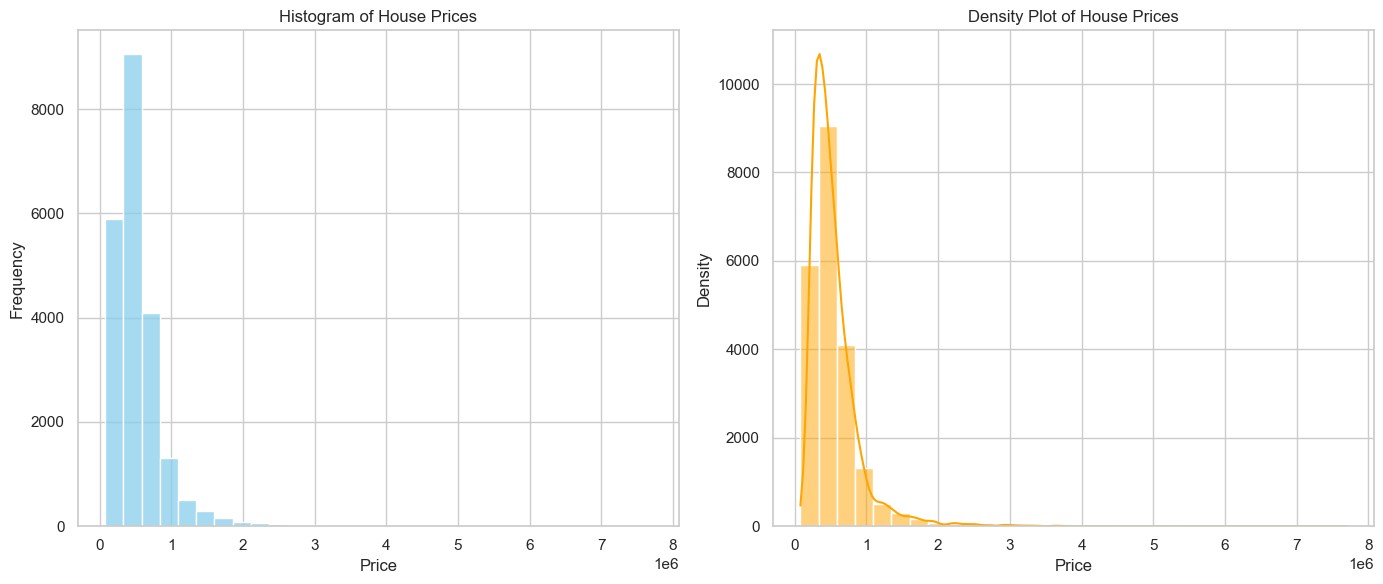

In [22]:


# Set the style for seaborn
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Histogram
sns.histplot(housing_data_encoded['price'], bins=30, kde=False, color='skyblue', ax=axes[0])
axes[0].set_title('Histogram of House Prices')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')

# Density Plot
sns.histplot(housing_data_encoded['price'], bins=30, kde=True, color='orange', ax=axes[1])
axes[1].set_title('Density Plot of House Prices')
axes[1].set_xlabel('Price')
axes[1].set_ylabel('Density')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


##### Interprtation:

##### #Distribution of House Age

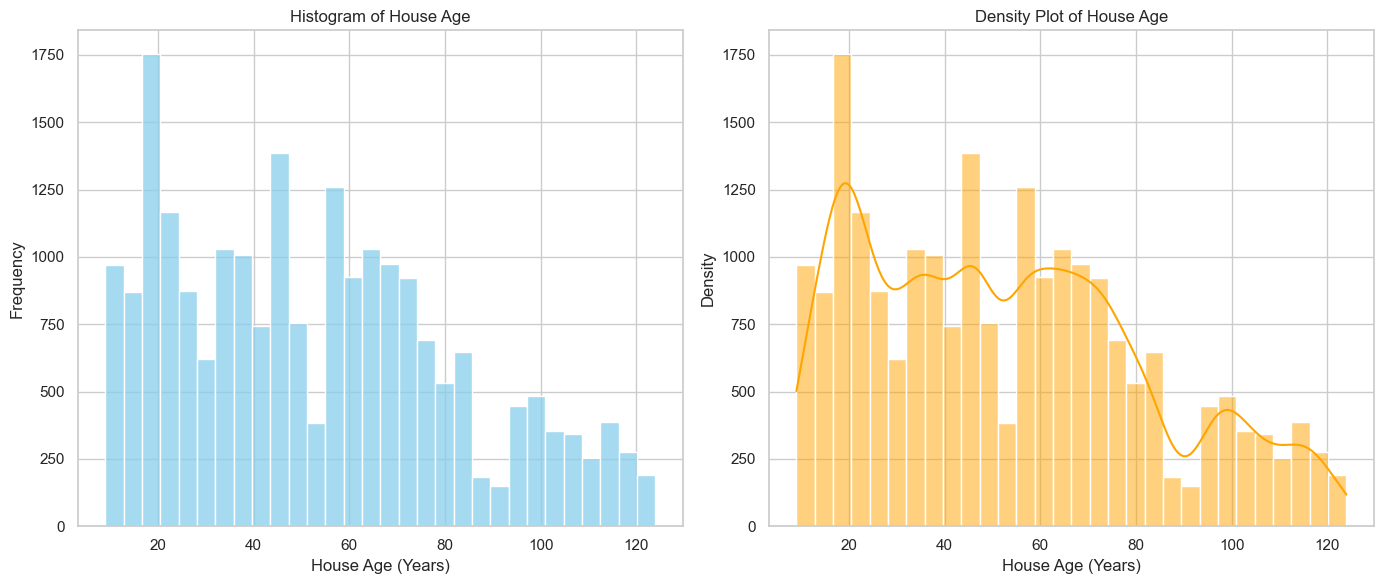

In [24]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Histogram for house_age
sns.histplot(housing_data_encoded['house_age'], bins=30, kde=False, color='skyblue', ax=axes[0])
axes[0].set_title('Histogram of House Age')
axes[0].set_xlabel('House Age (Years)')
axes[0].set_ylabel('Frequency')

# Density Plot for house_age
sns.histplot(housing_data_encoded['house_age'], bins=30, kde=True, color='orange', ax=axes[1])
axes[1].set_title('Density Plot of House Age')
axes[1].set_xlabel('House Age (Years)')
axes[1].set_ylabel('Density')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()

##### Interpretation:

##### #Distribution of Bedrooms, Bathrooms and Floors.

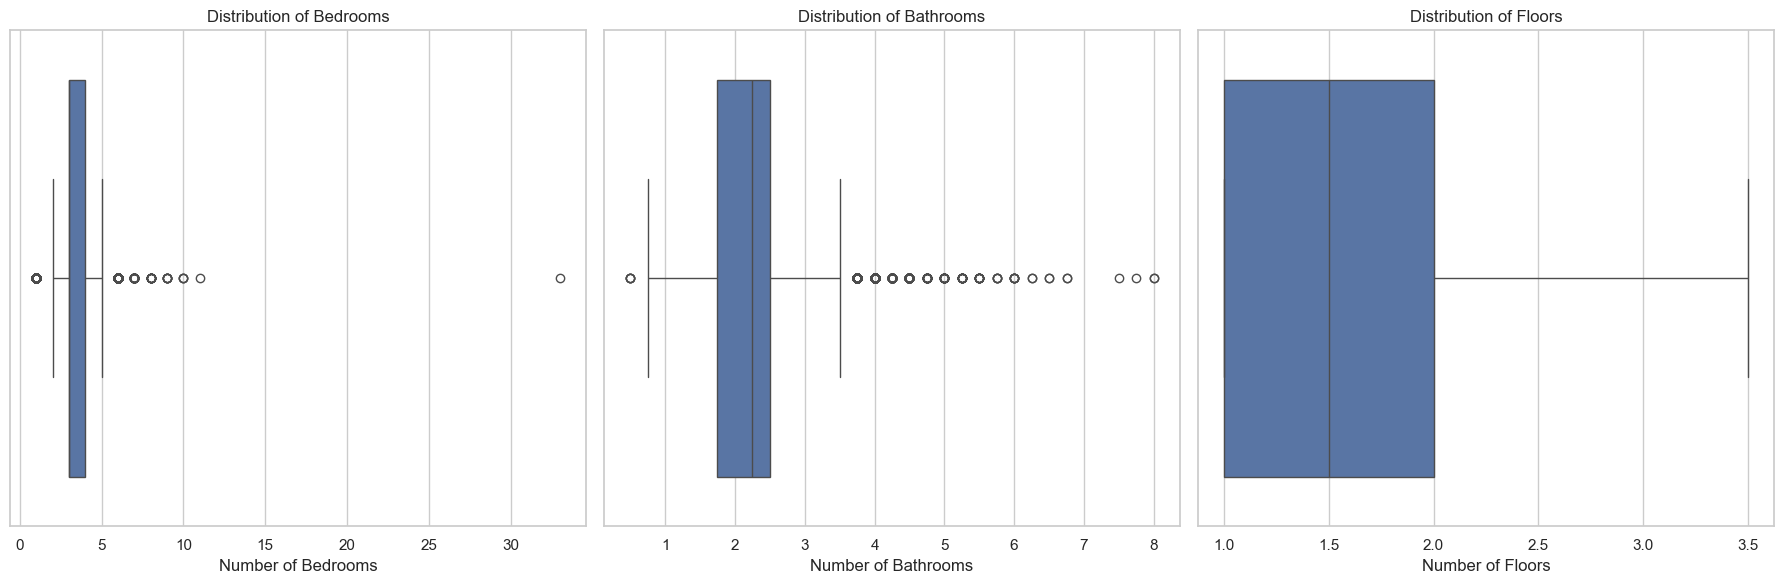

In [28]:

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Box plot for bedrooms
sns.boxplot(x=housing_data_encoded['bedrooms'], ax=axes[0])
axes[0].set_title('Distribution of Bedrooms')
axes[0].set_xlabel('Number of Bedrooms')

# Box plot for bathrooms
sns.boxplot(x=housing_data_encoded['bathrooms'], ax=axes[1])
axes[1].set_title('Distribution of Bathrooms')
axes[1].set_xlabel('Number of Bathrooms')

# Box plot for floors
sns.boxplot(x=housing_data_encoded['floors'], ax=axes[2])
axes[2].set_title('Distribution of Floors')
axes[2].set_xlabel('Number of Floors')

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


##### Interpretation:

### b.) Bivariate Analysis

In [33]:
# Define the labels with ranges
labels = ["70K-100K", "100K-300K", "300K-600K", "600K-1M", "1M-2M", "2M-5M", "5M-8M"]

# Cut the data into the specified ranges and assign labels
housing_data_encoded["price_range"] = pd.cut(housing_data_encoded.price,
                                            bins=[70000, 100000, 300000, 600000, 1000000, 2000000, 5000000, 8000000],
                                            labels=labels)

# Count the occurrences of each category
counts = housing_data_encoded['price_range'].value_counts()
print(counts)

price_range
300K-600K    10782
600K-1M       4796
100K-300K     4531
1M-2M         1260
2M-5M          191
70K-100K        30
5M-8M            7
Name: count, dtype: int64


In [34]:
housing_data_encoded.sample(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,...,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,house_age,renovation_age,total_sqft,pricerange,price_range
11485,3260200200,2014-10-30,580000.0,3,2.25,1670,7416,1.0,1220,450.0,...,False,False,True,False,False,50,0.0,10756.0,300K-600K,300K-600K
3075,8651401270,2015-05-04,203000.0,3,1.00,840,6500,1.0,840,0.0,...,False,True,False,False,False,55,0.0,8180.0,100K-300K,100K-300K
14083,1338800365,2014-05-07,1500000.0,6,2.50,3560,6480,2.5,3560,0.0,...,False,False,False,False,False,110,0.0,13600.0,1M-2M,1M-2M
19515,3303850360,2014-06-25,1280000.0,4,3.50,4660,17398,2.0,4660,0.0,...,False,False,False,False,False,21,0.0,26718.0,1M-2M,1M-2M
8722,5249804760,2015-05-05,479500.0,2,1.00,930,5760,1.0,730,200.0,...,False,True,False,False,False,107,0.0,7620.0,300K-600K,300K-600K


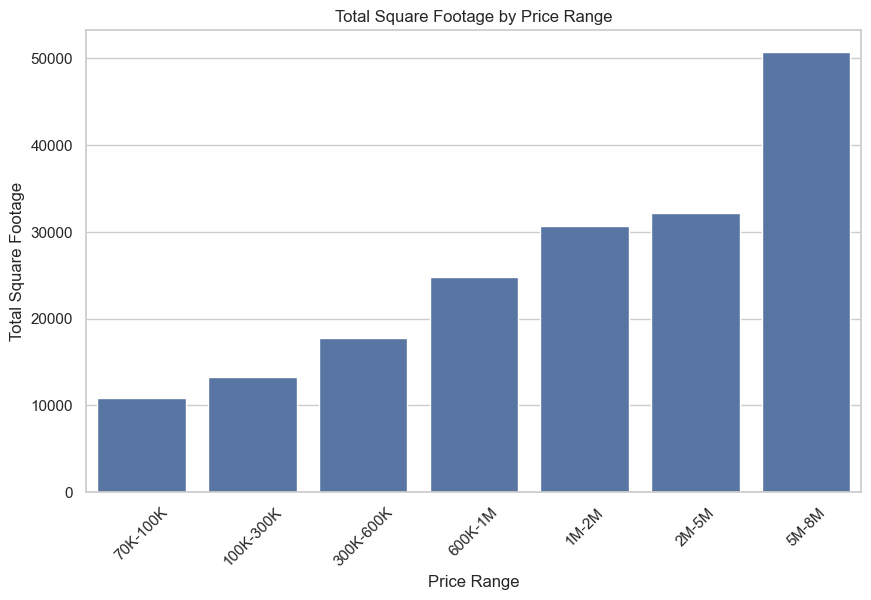

In [37]:

# Set the style of seaborn
sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="pricerange", y="total_sqft", data=housing_data_encoded, errorbar=None)
plt.title("Total Square Footage by Price Range")
plt.xlabel("Price Range")
plt.ylabel("Total Square Footage")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


##### Interpretation:
The bar plot illustrates the relationship between price range and total square footage. Each bar represents the total square footage of houses within different price range categories. 
From the graph, it is evident that there is a positive association between house size and price. Specifically, larger houses, as indicated by higher total square footage, tend to command higher prices. This suggests that there is a tendency for bigger houses to have a higher price, indicating a positive correlation between the size of the property and its price.


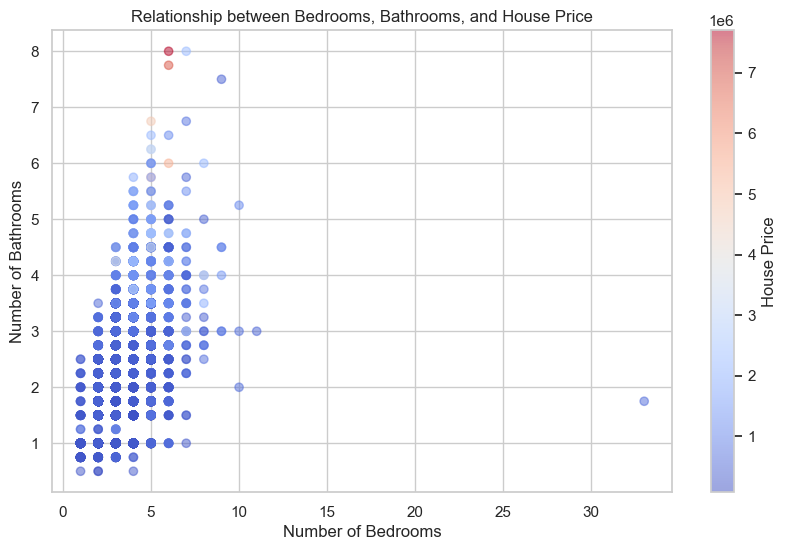

In [40]:
# Creating a scatter plot for the relationship between bedrooms, bathrooms, and house price
plt.figure(figsize=(10, 6))
plt.scatter(housing_data_encoded['bedrooms'], housing_data_encoded['bathrooms'], c=housing_data_encoded['price'], cmap='coolwarm', alpha=0.5)
plt.colorbar(label='House Price')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Number of Bathrooms')
plt.title('Relationship between Bedrooms, Bathrooms, and House Price')
plt.grid(True)
plt.show()


##### Interpretation:
The scatter plot reveals a clear relationship between the number of bedrooms, bathrooms, and house prices. It indicates that houses with more bedrooms and bathrooms tend to command higher prices, reflecting buyer preferences for space and convenience. However, there's a diminishing return on the value added by additional bedrooms beyond a certain point. Understanding this relationship is crucial for both buyers and sellers in the real estate market, allowing them to make informed decisions based on their needs and market dynamics.
A house with a good balance of bedrooms and bathrooms tends to attract a wider range of potential buyers.

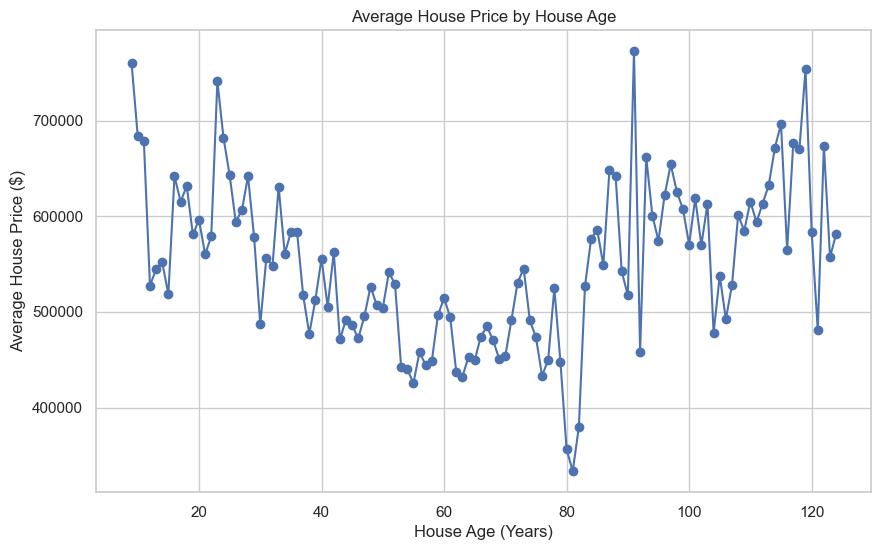

In [41]:
# Line plot for house age vs. average house price
average_price_by_age = housing_data_encoded.groupby('house_age')['price'].mean()
plt.figure(figsize=(10, 6))
plt.plot(average_price_by_age.index, average_price_by_age.values, marker='o', linestyle='-')
plt.xlabel('House Age (Years)')
plt.ylabel('Average House Price ($)')
plt.title('Average House Price by House Age')
plt.grid(True)
plt.show()


##### Interpretation:

### c.) Multivariate Analysis

In [49]:
# Calculate the correlation Matrix
# Drop categorical variables
numeric_data = housing_data_encoded.select_dtypes(include='number')
correlation = numeric_data.corr()['price'].drop(['id'])  # Drop 'price' and 'id' columns from correlation calculation
print(correlation)


price             1.000000
bedrooms          0.308787
bathrooms         0.525906
sqft_living       0.701917
sqft_lot          0.089876
floors            0.256804
sqft_above        0.605368
sqft_basement     0.321108
yr_built          0.053953
yr_renovated      0.117855
zipcode          -0.053402
lat               0.306692
long              0.022036
sqft_living15     0.585241
sqft_lot15        0.082845
house_age        -0.053953
renovation_age    0.082779
total_sqft        0.119913
Name: price, dtype: float64


In [50]:

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


IndexError: Inconsistent shape between the condition and the input (got (18, 1) and (18,))

<Figure size 1200x800 with 0 Axes>

In [ ]:
housing_data_encoded['v']